## 1. Import necessasry libraries

In [35]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

## 2. Import data

In [2]:
cars_data = pd.read_csv('Cars.csv')
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


## 3. Data Understanding

### 3.1 Initial Analysis

In [3]:
cars_data.shape

(81, 5)

In [4]:
cars_data.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [5]:
cars_data.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

### 3.2 Assumptions Check

### Assumption 1 : Test for Linearity

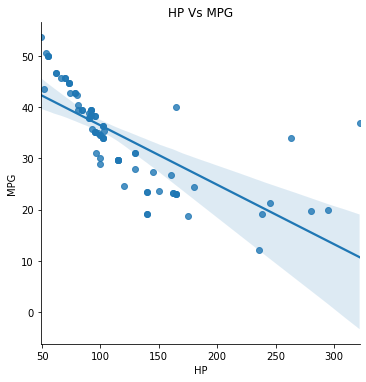

In [7]:
sns.lmplot(x='HP',y='MPG',data=cars_data)
plt.title('HP Vs MPG')
plt.show()

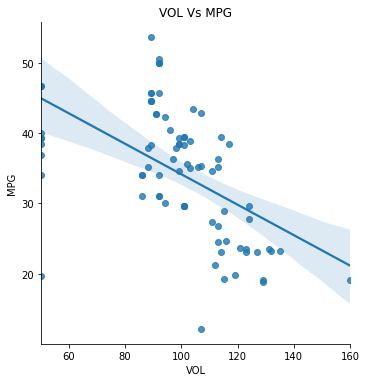

In [8]:
sns.lmplot(x='VOL',y='MPG',data=cars_data)
plt.title('VOL Vs MPG')
plt.show()

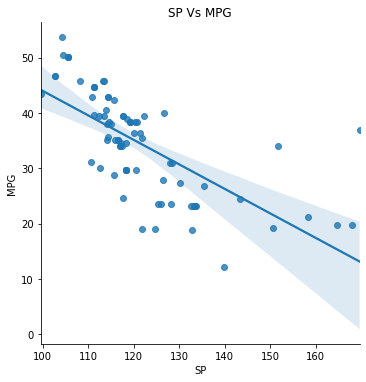

In [9]:
sns.lmplot(x='SP',y='MPG',data=cars_data)
plt.title('SP Vs MPG')
plt.show()

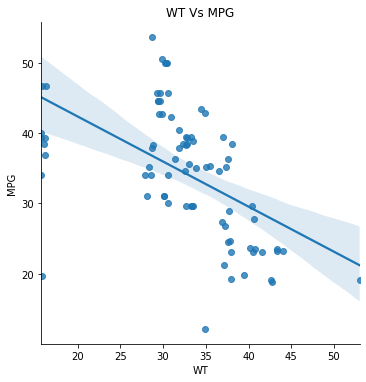

In [10]:
sns.lmplot(x='WT',y='MPG',data=cars_data)
plt.title('WT Vs MPG')
plt.show()

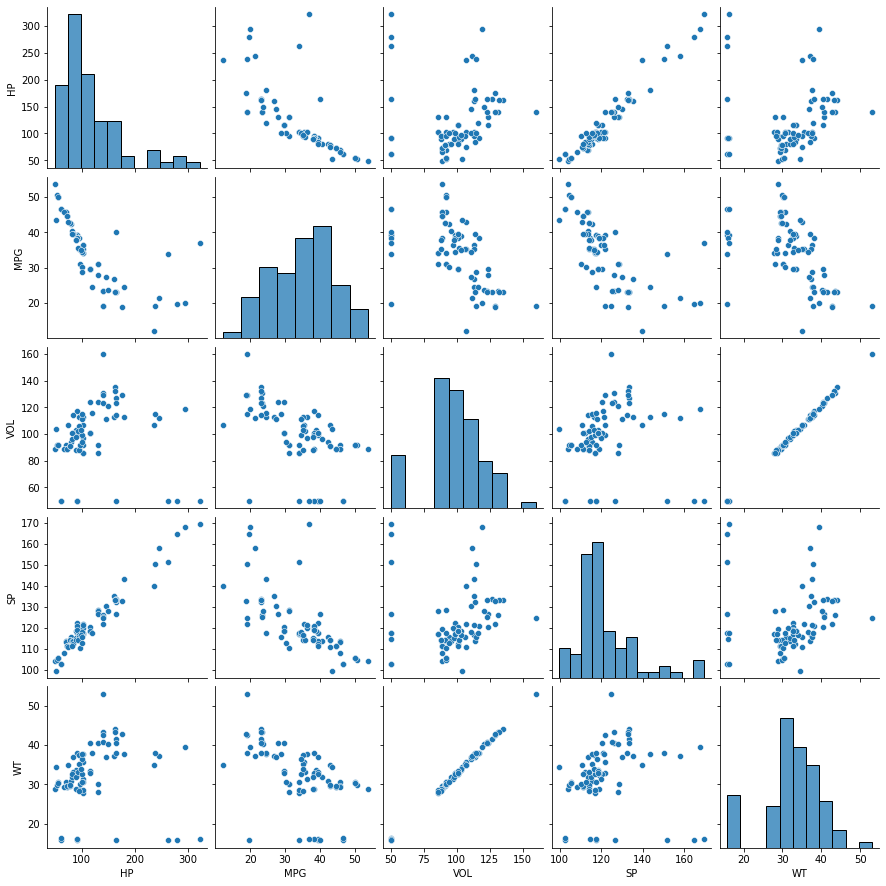

In [11]:
sns.pairplot(data = cars_data)
plt.show()

### Observation

Linearity Test is **FAILED.**

## ========================================================================

### Create a Reference data to understand how the features should behave for Linear Regression

In [13]:
cars_data.shape

(81, 5)

In [31]:
import numpy as np
X = np.random.randn(81)
y = X * 10 + np.random.randn(81)*2

In [32]:
demo_data = pd.DataFrame([X,y]).T
demo_data.columns = ['X','y']
demo_data

,X,y
0,1.254092,13.819841
1,1.411886,14.404896
2,2.508739,22.863014
3,-0.624824,-3.582315
4,-0.621181,-9.779264
...,...,...
76,-1.391760,-15.627767
77,0.314458,4.817917
78,-2.037051,-18.964390
79,0.045953,0.426379


### 1. Test of Linearity

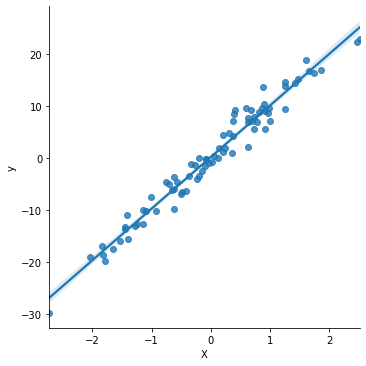

In [33]:
sns.lmplot(x='X',y='y',data=demo_data)
plt.show()

### Observation

Linearity Test is **PASS**.

### 2. Test for Normality

By using 2 techniques we can check whether the data is following Normal distribution or not.

**1. By using DISTPLOT**

**2. By using QQPLOT/PROBPLOT**

#### Using Distplot

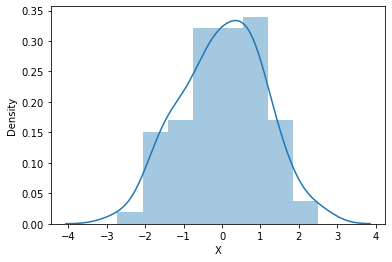

In [36]:
sns.distplot(a=demo_data['X'])
plt.show()

In [41]:
demo_data['X'].skew()

-0.09449421221780717

In [42]:
demo_data['X'].kurtosis()

-0.3060097517400715

### Observation:

Normality Test is passed.

#### Using QQPLOT?PROBPLOT

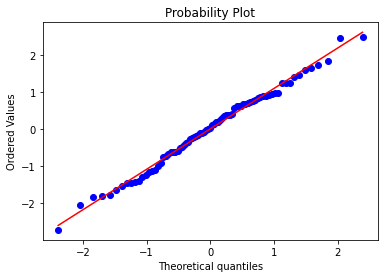

In [40]:
from scipy import stats
stats.probplot(x = demo_data['X'],dist='norm',plot=plt)
plt.show()

### Observation

The data is following Normal Distribution.

### 3. No Auoregression - Passed.

### 4. No Multicollinearity - Passed

### 5. Homoscadasicity Check || 6. Zero Residual Mean Check:

* Can be done post Model Training.

##### Note: For Homoscadascity check, all the input features should be in similar scale.

## Model Building using SKLEARN library

In [51]:
X = demo_data[['X']]
y = demo_data[['y']]

In [52]:
X

,X
0,1.254092
1,1.411886
2,2.508739
3,-0.624824
4,-0.621181
...,...
76,-1.391760
77,0.314458
78,-2.037051
79,0.045953


In [53]:
y

,y
0,13.819841
1,14.404896
2,22.863014
3,-3.582315
4,-9.779264
...,...
76,-15.627767
77,4.817917
78,-18.964390
79,0.426379


## Model Training

In [54]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression() #Model Initialization
linear_model.fit(X,y) #Training happens

LinearRegression()

In [55]:
linear_model.coef_

array([[9.9239994]])

In [56]:
linear_model.intercept_

array([0.19576905])

### Model Testing

In [58]:
y_pred = linear_model.predict(X)

### Model Evaluation

In [59]:
y

,y
0,13.819841
1,14.404896
2,22.863014
3,-3.582315
4,-9.779264
...,...
76,-15.627767
77,4.817917
78,-18.964390
79,0.426379


In [60]:
y_pred

array([[ 12.64137846],
       [ 14.20732643],
       [ 25.09249109],
       [ -6.00498646],
       [ -5.96883452],
       [-17.55710757],
       [ -6.8787927 ],
       [ -7.31175829],
       [  3.99137782],
       [ 12.6751647 ],
       [-10.68653345],
       [ -3.12376639],
       [-12.13700627],
       [-16.20680704],
       [ -0.7830735 ],
       [  9.98943119],
       [-17.81178678],
       [ -3.45187145],
       [  6.47945886],
       [  7.41674047],
       [  4.14305571],
       [ -0.57402202],
       [  6.03697858],
       [ -1.21255838],
       [ -4.74508323],
       [ -4.62023853],
       [-26.82503893],
       [  9.72828706],
       [  9.33808682],
       [  3.96564337],
       [  2.19983108],
       [ -1.71495419],
       [ 14.73982909],
       [-13.84322284],
       [-11.1198627 ],
       [ 12.6889536 ],
       [  8.18678736],
       [ -5.54065585],
       [  6.91706207],
       [ -3.89481886],
       [-14.94580543],
       [  9.27135123],
       [  6.44462583],
       [  6

In [61]:
error = y - y_pred
error

,y
0,1.178463
1,0.197570
2,-2.229477
3,2.422671
4,-3.810430
...,...
76,-2.011712
77,1.501470
78,1.055535
79,-0.225430


### Now, we can check for Homoscadasicity and Zero Residual Mean

### 5. Homoscedasticity

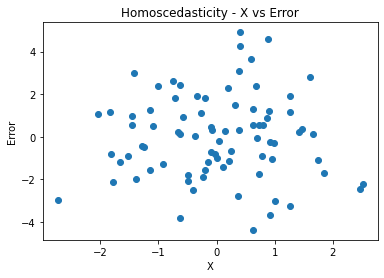

In [63]:
plt.scatter(x = demo_data['X'],y = error)
plt.title('Homoscedasticity - X vs Error')
plt.xlabel('X')
plt.ylabel('Error')
plt.show()

### TAKEAWAY : The density of points above and below line must be similar.

### 6. Test for Zero Residual Mean 

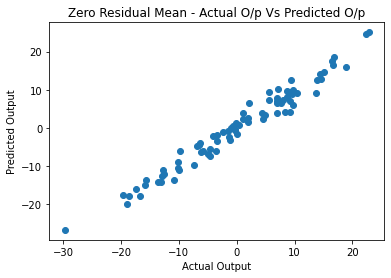

In [65]:
plt.scatter(x = demo_data['y'], y =y_pred )
plt.title('Zero Residual Mean - Actual O/p Vs Predicted O/p')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()

In [67]:
error.mean() #Error is Zero

y   -1.679041e-16
dtype: float64

### =========================================================================================

### For Cars Data - Assumption Check

### 2. Test for Normality

#### 2.1 Using distplot

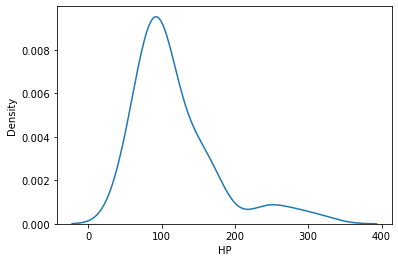

In [69]:
sns.distplot(a=cars_data['HP'],hist=False)
plt.show()

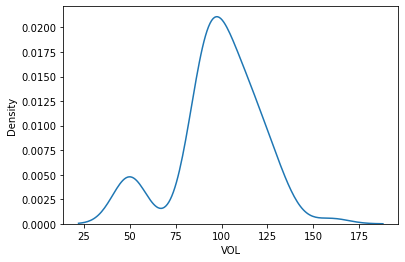

In [70]:
sns.distplot(a=cars_data['VOL'],hist=False)
plt.show()

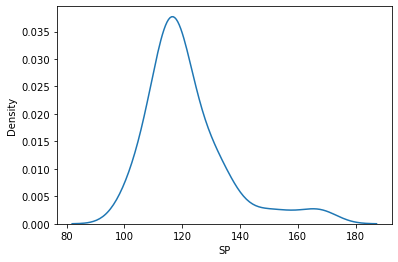

In [71]:
sns.distplot(a=cars_data['SP'],hist=False)
plt.show()

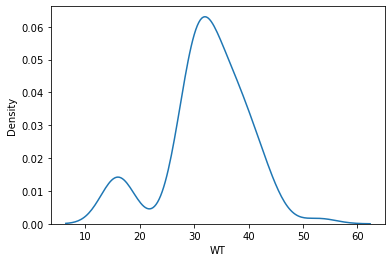

In [72]:
sns.distplot(a=cars_data['WT'],hist=False)
plt.show()

### Observation:

Normality Test fails.

#### 2.1 Using probplot

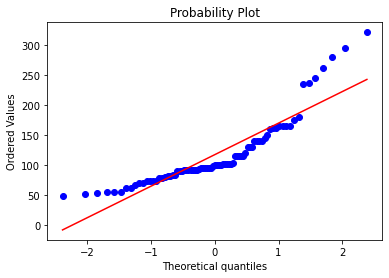

In [73]:
stats.probplot(x = cars_data['HP'],dist='norm',plot=plt)
plt.show()

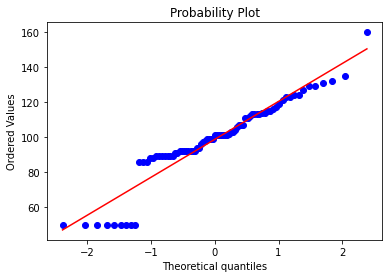

In [74]:
stats.probplot(x = cars_data['VOL'],dist='norm',plot=plt)
plt.show()

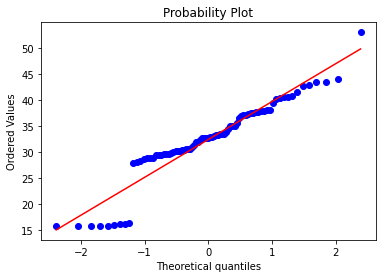

In [75]:
stats.probplot(x = cars_data['WT'],dist='norm',plot=plt)
plt.show()

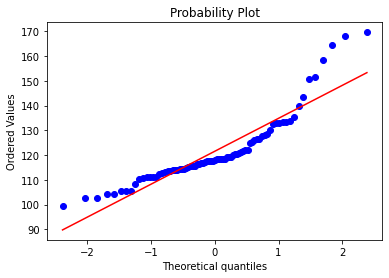

In [76]:
stats.probplot(x = cars_data['SP'],dist='norm',plot=plt)
plt.show()

### Observation:

Normality Test fails.

### 3. Test for Multicollinearity

By using 2 techniques,

**1. Correlation Matrix**

**2. Variance Inflation Factor(VIF)**

#### 3.1 Correlation Matrix

In [79]:
corr_matrix = cars_data.corr().round(2)
corr_matrix

,HP,MPG,VOL,SP,WT
HP,1.00,-0.73,0.08,0.97,0.08
MPG,-0.73,1.00,-0.53,-0.69,-0.53
VOL,0.08,-0.53,1.00,0.10,1.00
SP,0.97,-0.69,0.10,1.00,0.10
WT,0.08,-0.53,1.00,0.10,1.00


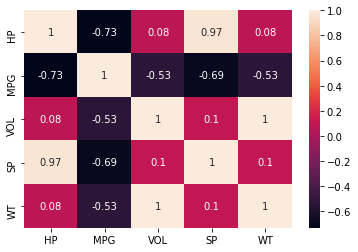

In [82]:
sns.heatmap(data = corr_matrix,annot=True)
plt.show()

### Observation:

There is multicollinearity in my data. So this Test also fails.

### 4. No AutoRegression - Passed.

### Model Building

In [83]:
X = cars_data.drop(labels=['MPG'],axis = 1)
y = cars_data[['MPG']]

In [84]:
X

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [85]:
y

,MPG
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
...,...
76,36.900000
77,19.197888
78,34.000000
79,19.833733


In [86]:
X.mean()

HP     117.469136
VOL     98.765432
SP     121.540272
WT      32.412577
dtype: float64

In [87]:
X.std()

HP     57.113502
VOL    22.301497
SP     14.181432
WT      7.492813
dtype: float64

In [91]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_X = std_scaler.fit_transform(X)
scaled_X

array([[-1.20629511, -0.44061061, -1.23140253, -0.49023816],
       [-1.1005866 , -0.30525236, -1.14087145, -0.26129934],
       [-1.1005866 , -0.30525236, -1.14087145, -0.29799301],
       [-0.83631531, -0.30525236, -0.57323872, -0.2391033 ],
       [-1.13582277, -0.30525236, -1.21182554, -0.33887816],
       [-0.83631531, -0.44061061, -0.59281571, -0.37881419],
       [-1.1005866 , -0.30525236, -1.14087145, -0.28256505],
       [-0.97726   , -2.20026792, -1.34399532, -2.22453536],
       [-0.97726   , -2.20026792, -1.34399532, -2.15581433],
       [-0.66013445, -0.21501352, -0.4182792 , -0.20042158],
       [-0.78346105, -0.44061061, -0.73472389, -0.40949027],
       [-0.44871742, -2.20026792, -0.27968395, -2.23718888],
       [-0.44871742,  0.01058357,  0.04007367,  0.05385348],
       [-0.78346105, -0.44061061, -0.73472389, -0.40746314],
       [-0.90678765, -0.44061061, -0.94758617, -0.41164734],
       [-0.78346105, -0.44061061, -0.73472389, -0.37710085],
       [-0.69537062, -0.

In [94]:
scaled_X= pd.DataFrame(data=scaled_X,columns = ['HP','VOL','SP','WT'])
scaled_X

,HP,VOL,SP,WT
0,-1.206295,-0.440611,-1.231403,-0.490238
1,-1.100587,-0.305252,-1.140871,-0.261299
2,-1.100587,-0.305252,-1.140871,-0.297993
3,-0.836315,-0.305252,-0.573239,-0.239103
4,-1.135823,-0.305252,-1.211826,-0.338878
...,...,...,...,...
76,3.603442,-2.200268,3.409929,-2.186236
77,2.123523,0.732494,2.060245,0.740025
78,2.563975,-2.200268,2.132755,-2.235028
79,3.127754,0.912972,3.292567,0.941462


In [95]:
scaled_X.mean()

HP    -1.041691e-16
VOL    5.825244e-17
SP     1.274701e-15
WT     1.170531e-15
dtype: float64

In [96]:
scaled_X.std()

HP     1.006231
VOL    1.006231
SP     1.006231
WT     1.006231
dtype: float64

### Model Training

In [97]:
from sklearn.linear_model import LinearRegression
linear_model_2 = LinearRegression()
linear_model_2.fit(scaled_X,y)

LinearRegression()

### Model Testing

In [99]:
y_pred = linear_model_2.predict(scaled_X)

### Model Evaluation

In [101]:
error = y - y_pred
error

,MPG
0,10.258747
1,7.624608
2,7.734060
3,3.157963
4,8.331584
...,...
76,15.617904
77,1.298838
78,7.863547
79,7.517122


### 5. Test for Homoscedasticity

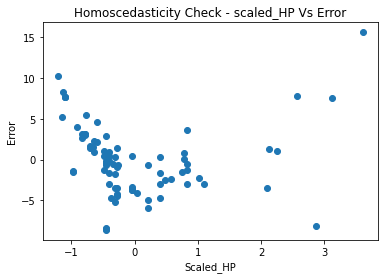

In [103]:
plt.scatter(x = scaled_X['HP'], y=error)
plt.title('Homoscedasticity Check - scaled_HP Vs Error')
plt.xlabel('Scaled_HP')
plt.ylabel('Error')
plt.show()

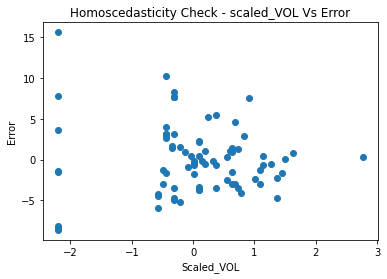

In [104]:
plt.scatter(x = scaled_X['VOL'], y=error)
plt.title('Homoscedasticity Check - scaled_VOL Vs Error')
plt.xlabel('Scaled_VOL')
plt.ylabel('Error')
plt.show()

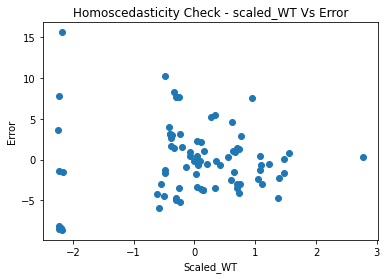

In [105]:
plt.scatter(x = scaled_X['WT'], y=error)
plt.title('Homoscedasticity Check - scaled_WT Vs Error')
plt.xlabel('Scaled_WT')
plt.ylabel('Error')
plt.show()

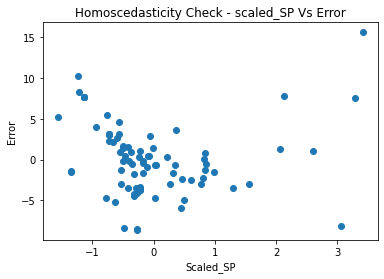

In [106]:
plt.scatter(x = scaled_X['SP'], y=error)
plt.title('Homoscedasticity Check - scaled_SP Vs Error')
plt.xlabel('Scaled_SP')
plt.ylabel('Error')
plt.show()

### Observation

Homoscedasticity Check **failed**.

### 6. Test for Zero Residual Mean

In [107]:
y

,MPG
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
...,...
76,36.900000
77,19.197888
78,34.000000
79,19.833733


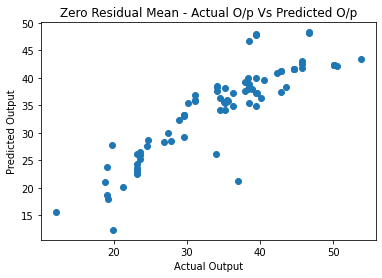

In [109]:
plt.scatter(x = y,y = y_pred)
plt.title('Zero Residual Mean - Actual O/p Vs Predicted O/p')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()

### Observation:

Zero Residual Mean Test is also Fails.